In [3]:
import numpy as np
import pandas as pd

In [4]:
activity_df = pd.read_csv('duckdb/vgsales.csv')

In [5]:
activity_df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


1. Which 5 games have the highest global sales? What do they have in common?

In [6]:
top5 = activity_df.sort_values(by='Global_Sales', ascending=False).head(5)
top5

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


2. Calculate total sales by genre. Which genre generates the most revenue globally?

In [9]:
import pandas as pd
# Assuming the data is already loaded into a DataFrame called 'df'

# 1. Group by 'Genre' and sum the 'Global_Sales'
genre_sales = activity_df.groupby('Genre')['Global_Sales'].sum().reset_index()

# 2. Rename the sales column for clarity
genre_sales.columns = ['Genre', 'Total_Global_Sales']

# 3. Sort the result by 'Total_Global_Sales' in descending order
genre_sales_sorted = genre_sales.sort_values(by='Total_Global_Sales', ascending=False)

In [10]:
genre_sales_sorted

,Genre,Total_Global_Sales
0,Action,1751.18
10,Sports,1330.93
8,Shooter,1037.37
7,Role-Playing,927.37
4,Platform,831.37
3,Misc,809.96
6,Racing,732.04
2,Fighting,448.91
9,Simulation,392.20
5,Puzzle,244.95


3. Find the average sales per game for each platform. Which platforms have the highest average?

In [7]:
avg_sales_by_genre = activity_df.groupby('Genre')['Global_Sales'].mean().reset_index()

# Rename and sort for a clean presentation
avg_sales_by_genre.columns = ['Genre', 'Average_Global_Sales']
avg_sales_by_genre_sorted = avg_sales_by_genre.sort_values(
    by='Average_Global_Sales', ascending=False
)

print("Average Sales per Game for Each Genre (in millions):\n")
print(avg_sales_by_genre_sorted)

Average Sales per Game for Each Genre (in millions):

           Genre  Average_Global_Sales
4       Platform              0.938341
8        Shooter              0.791885
7   Role-Playing              0.623233
6         Racing              0.586101
10        Sports              0.567319
2       Fighting              0.529375
0         Action              0.528100
3           Misc              0.465762
9     Simulation              0.452364
5         Puzzle              0.420876
11      Strategy              0.257151
1      Adventure              0.185879


4. Which publisher has released the most games? Do they also have the highest total sales?

In [9]:
publisher_stats = (
    activity_df.groupby("Publisher")
      .agg(
          unique_games=("Name", "nunique"),      # number of distinct game names
          total_sales=("Global_Sales", "sum")    # total global sales
      )
      .reset_index()
      .sort_values(by="total_sales", ascending=False)  # optional: sort by sales
)

print(publisher_stats)

                       Publisher  unique_games  total_sales
359                     Nintendo           667      1786.56
138              Electronic Arts           606      1110.32
21                    Activision           417       727.46
456  Sony Computer Entertainment           622       607.50
525                      Ubisoft           572       474.72
..                           ...           ...          ...
375                    Ongakukan             1         0.01
96                      Commseed             1         0.01
495                       Takuyo             1         0.01
76                      Boost On             1         0.01
350                   Naxat Soft             1         0.01

[578 rows x 3 columns]


5. For games released after 2010, which genre dominated each region (NA, EU, JP)?

In [13]:
activity_df["Year"] = pd.to_numeric(activity_df["Year"], errors="coerce")

# Filter for games released after 2010
df_after_2010 = activity_df[activity_df["Year"] > 2010]

# Group by Genre and sum up sales by region
region_sales = (
    df_after_2010.groupby("Genre")[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]]
    .sum()
)

# Find the top-selling genre per region
top_genres = {
    "NA": region_sales["NA_Sales"].idxmax(),
    "EU": region_sales["EU_Sales"].idxmax(),
    "JP": region_sales["JP_Sales"].idxmax(),
    "Other": region_sales["Other_Sales"].idxmax(),
}

print("Top genre by region (for games after 2010):")
print(top_genres)

Top genre by region (for games after 2010):
{'NA': 'Action', 'EU': 'Action', 'JP': 'Role-Playing', 'Other': 'Action'}


Calculate the percentage of global sales that each region contributes. Which region is most important?

In [14]:
region_totals = {
    "NA_Sales": activity_df["NA_Sales"].sum(),
    "EU_Sales": activity_df["EU_Sales"].sum(),
    "JP_Sales": activity_df["JP_Sales"].sum(),
    "Other_Sales": activity_df["Other_Sales"].sum(),
    "Global_Sales": activity_df["Global_Sales"].sum()
}

# Calculate percentage contribution of each region
percentages = {
    region: (sales / region_totals["Global_Sales"]) * 100
    for region, sales in region_totals.items()
    if region != "Global_Sales"
}

# Convert to DataFrame for readability
region_share = pd.DataFrame(list(percentages.items()), columns=["Region", "Percentage"])
region_share = region_share.sort_values(by="Percentage", ascending=False).reset_index(drop=True)

# Identify the most important region
most_important = region_share.iloc[0]

print("Percentage of Global Sales by Region:")
print(region_share)
print(f"\nMost important region: {most_important['Region']} ({most_important['Percentage']:.2f}%)")

Percentage of Global Sales by Region:
        Region  Percentage
0     NA_Sales   49.245889
1     EU_Sales   27.287107
2     JP_Sales   14.472604
3  Other_Sales    8.942945

Most important region: NA_Sales (49.25%)


In [15]:
# Filter games where Japanese sales exceed North American sales
jp_over_na = activity_df[activity_df["JP_Sales"] > activity_df["NA_Sales"]]

# Display filtered games
print("Games where JP_Sales > NA_Sales:")
print(jp_over_na[["Name", "Platform", "Year", "Genre", "Publisher", "NA_Sales", "JP_Sales"]])

# Analyze patterns by genre
genre_pattern = (
    jp_over_na.groupby("Genre")["Name"]
    .count()
    .sort_values(ascending=False)
    .reset_index(name="Count")
)

# Analyze patterns by publisher
publisher_pattern = (
    jp_over_na.groupby("Publisher")["Name"]
    .count()
    .sort_values(ascending=False)
    .reset_index(name="Count")
)

print("\nPattern by Genre (where JP sales exceed NA sales):")
print(genre_pattern)

print("\nPattern by Publisher (where JP sales exceed NA sales):")
print(publisher_pattern.head(10))  # top 10 publishers

Games where JP_Sales > NA_Sales:
                                                    Name Platform    Year  \
26                           Pokemon Black/Pokemon White       DS  2010.0   
27           Brain Age 2: More Training in Minutes a Day       DS  2005.0   
41                           Animal Crossing: Wild World       DS  2005.0   
66                                     Final Fantasy VII       PS  1997.0   
73                             Animal Crossing: New Leaf      3DS  2012.0   
...                                                  ...      ...     ...   
16575                              Neo Angelique Special      PSP  2008.0   
16580                                          Real Rode      PS2  2008.0   
16587                           Mezase!! Tsuri Master DS       DS  2009.0   
16589  Chou Ezaru wa Akai Hana: Koi wa Tsuki ni Shiru...      PSV  2016.0   
16590  Eiyuu Densetsu: Sora no Kiseki Material Collec...      PSP  2007.0   

              Genre                    Pub

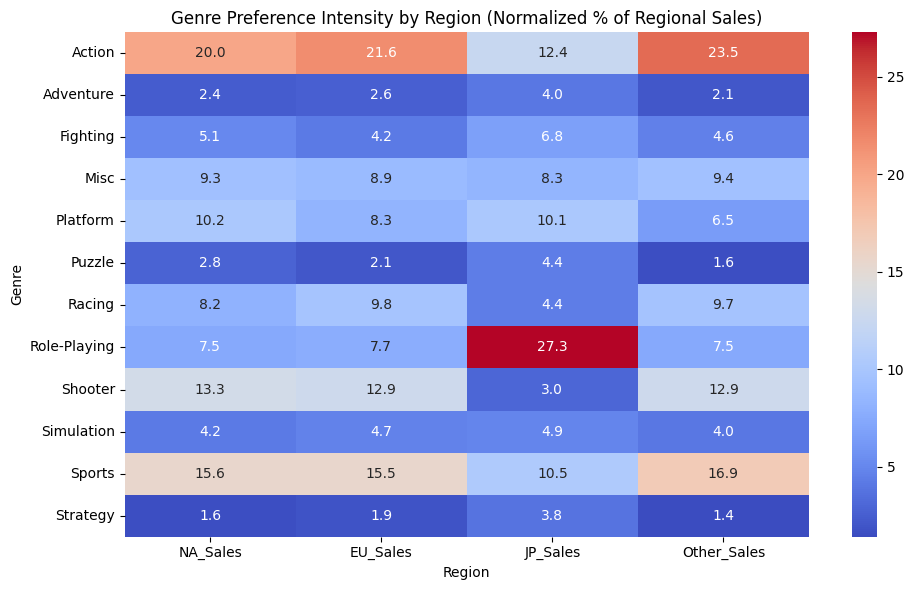

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

genre_region_sales = activity_df.groupby("Genre")[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]].sum()

# Step 2: Normalize each region so that column sums to 100%
genre_region_percent = genre_region_sales.div(genre_region_sales.sum(axis=0), axis=1) * 100

# Step 3: Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(genre_region_percent, annot=True, fmt=".1f", cmap="coolwarm")

plt.title("Genre Preference Intensity by Region (Normalized % of Regional Sales)")
plt.xlabel("Region")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()

In [9]:
arr2d[1, 2]

6

                       Publisher  unique_games  total_sales
359                     Nintendo           667      1786.56
138              Electronic Arts           606      1110.32
21                    Activision           417       727.46
456  Sony Computer Entertainment           622       607.50
525                      Ubisoft           572       474.72
..                           ...           ...          ...
375                    Ongakukan             1         0.01
96                      Commseed             1         0.01
495                       Takuyo             1         0.01
76                      Boost On             1         0.01
350                   Naxat Soft             1         0.01

[578 rows x 3 columns]
